In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../train_project.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_12852\2690733052.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_project.csv')


In [3]:
data = data.drop(['ID','Name','SSN'], axis=1)

In [4]:
data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
# Se parara datos numericos y datos categoricos
numerical_data = data.select_dtypes(include=['int64','float64'])
categorical_data = data.select_dtypes(include=['object'])

## Tratamiento de datos numericos
* Datos numericos detectados como object

In [6]:
def find_numerical(data:pd.DataFrame, columns:list):
    index_counter = {}
    for c in columns:
        index_per_column = []
        for idx, row in data[[c]].iterrows():
            try:
                float(row[c])
            except:
                index_per_column.append(idx)
        index_counter[c] = index_per_column 
    return index_counter

In [7]:
numeric_wrong_input = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment',
                       'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly',
                       'Monthly_Balance']
index_wrong_input = find_numerical(categorical_data, numeric_wrong_input)

In [8]:
numerical_as_object = categorical_data[numeric_wrong_input]
categorical_data = categorical_data.drop(numeric_wrong_input, axis=1)

> Limpiar dato uno a uno

In [9]:
# Age
numerical_as_object['Age'].iloc[index_wrong_input['Age']]

8          28_
54         34_
58         30_
71         24_
89         33_
         ...  
99908    4808_
99922      38_
99933      38_
99942      48_
99987      28_
Name: Age, Length: 4939, dtype: object

In [10]:
np.all(numerical_as_object['Age'].iloc[index_wrong_input['Age']].str.contains(r'\w+_$'))

True

In [11]:
numerical_as_object['Age'].iloc[index_wrong_input['Age']] = (numerical_as_object['Age']
                                                             .iloc[index_wrong_input['Age']]
                                                             .str.replace(r'_$', '',regex=True))

In [12]:
# Annual Income
numerical_as_object['Annual_Income'].iloc[index_wrong_input['Annual_Income']]

10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object

In [13]:
np.all(numerical_as_object['Annual_Income'].iloc[index_wrong_input['Annual_Income']].str.contains(r'\w+_$'))

True

In [14]:
numerical_as_object['Annual_Income'].iloc[index_wrong_input['Annual_Income']] = (numerical_as_object['Annual_Income']
                                        .iloc[index_wrong_input['Annual_Income']]
                                        .str.replace(r'_$', '',regex=True))

In [15]:
# Num of loan
numerical_as_object['Num_of_Loan'].iloc[index_wrong_input['Num_of_Loan']]

37       0_
80       3_
84       3_
94       2_
119      5_
         ..
99918    4_
99937    0_
99940    0_
99958    4_
99984    5_
Name: Num_of_Loan, Length: 4785, dtype: object

In [16]:
np.all(numerical_as_object['Num_of_Loan'].iloc[index_wrong_input['Num_of_Loan']].str.contains(r'\w+_$'))

True

In [17]:
numerical_as_object['Num_of_Loan'].iloc[index_wrong_input['Num_of_Loan']] = (numerical_as_object['Num_of_Loan']
                                                                            .iloc[index_wrong_input['Num_of_Loan']]
                                                                            .str.replace(r'_$', '',regex=True))

In [18]:
# Num of delayed payment
numerical_as_object['Num_of_Delayed_Payment'].iloc[index_wrong_input['Num_of_Delayed_Payment']]

6         8_
11        3_
53        3_
54        2_
119      13_
        ... 
99897    10_
99904     7_
99939    19_
99945     6_
99953     7_
Name: Num_of_Delayed_Payment, Length: 2744, dtype: object

In [19]:
np.all(numerical_as_object['Num_of_Delayed_Payment'].iloc[index_wrong_input['Num_of_Delayed_Payment']].str.contains(r'\w+_$'))

True

In [20]:
numerical_as_object['Num_of_Delayed_Payment'].iloc[index_wrong_input['Num_of_Delayed_Payment']] = (numerical_as_object['Num_of_Delayed_Payment']
                                                                                                    .iloc[index_wrong_input['Num_of_Delayed_Payment']]
                                                                                                    .str.replace(r'_$', '',regex=True))

In [21]:
# Changed Credit Limit
numerical_as_object['Changed_Credit_Limit'].iloc[index_wrong_input['Changed_Credit_Limit']]

2        _
65       _
66       _
109      _
110      _
        ..
99548    _
99618    _
99800    _
99892    _
99931    _
Name: Changed_Credit_Limit, Length: 2091, dtype: object

In [22]:
np.all(numerical_as_object['Changed_Credit_Limit'].iloc[index_wrong_input['Changed_Credit_Limit']] == '_')

True

In [23]:
numerical_as_object['Changed_Credit_Limit'].iloc[index_wrong_input['Changed_Credit_Limit']] = np.nan

In [24]:
# Outsanding debt
numerical_as_object['Outstanding_Debt'].iloc[index_wrong_input['Outstanding_Debt']]

87       1328.93_
142      1283.37_
368      2797.17_
632      3818.57_
703       343.84_
           ...   
99842     1095.9_
99862    1350.85_
99930    1453.61_
99984     3571.7_
99985     3571.7_
Name: Outstanding_Debt, Length: 1009, dtype: object

In [25]:
np.all(numerical_as_object['Outstanding_Debt'].iloc[index_wrong_input['Outstanding_Debt']].str.contains(r'\w+_$'))

True

In [26]:
numerical_as_object['Outstanding_Debt'].iloc[index_wrong_input['Outstanding_Debt']] = (numerical_as_object['Outstanding_Debt']
                                                                                      .iloc[index_wrong_input['Outstanding_Debt']]
                                                                                      .str.replace(r'_$', '',regex=True))

In [27]:
# Amount invested monthly
numerical_as_object['Amount_invested_monthly'].iloc[index_wrong_input['Amount_invested_monthly']]

18       __10000__
23       __10000__
28       __10000__
121      __10000__
142      __10000__
           ...    
99879    __10000__
99882    __10000__
99919    __10000__
99951    __10000__
99973    __10000__
Name: Amount_invested_monthly, Length: 4305, dtype: object

In [28]:
np.all(numerical_as_object['Amount_invested_monthly'].iloc[index_wrong_input['Amount_invested_monthly']].str.contains(r'^__.*__$'))

True

In [29]:
(numerical_as_object['Amount_invested_monthly']
 .iloc[index_wrong_input['Amount_invested_monthly']]) = (numerical_as_object['Amount_invested_monthly']
                                                        .iloc[index_wrong_input['Amount_invested_monthly']]
                                                        .str.replace(r'__', '',regex=True))

In [30]:
# Monthly 
numerical_as_object['Monthly_Balance'].iloc[index_wrong_input['Monthly_Balance']]

5545     __-333333333333333333333333333__
26177    __-333333333333333333333333333__
29158    __-333333333333333333333333333__
35570    __-333333333333333333333333333__
38622    __-333333333333333333333333333__
60009    __-333333333333333333333333333__
75251    __-333333333333333333333333333__
82918    __-333333333333333333333333333__
83255    __-333333333333333333333333333__
Name: Monthly_Balance, dtype: object

In [31]:
np.all(numerical_as_object['Monthly_Balance'].iloc[index_wrong_input['Monthly_Balance']].str.contains(r'^__.*__$'))

True

In [32]:
numerical_as_object['Monthly_Balance'].iloc[index_wrong_input['Monthly_Balance']] = np.nan

In [33]:
def to_numerical(data:pd.DataFrame, columns_int:list, columns_float:list):
    data = data.copy()
    for c_int in columns_int:
        data[c_int] = data[c_int].astype(np.float64)
    for c_float in columns_float:
        data[c_float] = data[c_float].astype(np.float64)
    return data

In [34]:
int_columns = ['Age','Num_of_Loan','Num_of_Delayed_Payment']
float_columns = ['Annual_Income','Changed_Credit_Limit',
                 'Outstanding_Debt','Amount_invested_monthly',
                 'Monthly_Balance']

In [35]:
numerical_as_object  = to_numerical(numerical_as_object, int_columns, float_columns)

* Combinar datos numericos

In [36]:
numerical_data = numerical_data.join(numerical_as_object)

In [37]:
numerical_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,NaN,3,4,3,-1,4.0,31.944960,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,NaN,3,4,3,3,4.0,28.609352,49.574949,-500.0,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,NaN,3,4,3,5,4.0,31.377862,49.574949,23.0,19114.12,4.0,4.0,6.27,809.98,199.458074,223.451310
4,1824.843333,3,4,3,6,4.0,24.797347,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4,6,7,23,3.0,34.663572,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,60.971333,479.866228
99996,3359.415833,4,6,7,18,3.0,40.565631,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,54.185950,496.651610
99997,3359.415833,4,6,5729,27,3.0,41.255522,35.104023,25.0,39628.99,2.0,6.0,11.50,502.38,24.028477,516.809083
99998,3359.415833,4,6,7,20,3.0,33.638208,35.104023,25.0,39628.99,2.0,NaN,11.50,502.38,251.672582,319.164979


* Eliminar datos negativos

In [38]:
for c  in numerical_data.columns:
    numerical_data[c] = numerical_data[c].apply(lambda x: np.nan if x < 0 else x)

* Deteccion de outliers

In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [40]:
def detect_outlier(data:pd.DataFrame) -> dict:
    data = data.copy()
    columns = data.columns
    dict_index_drop = {}
    for c in columns:
        ll= IsolationForest()
        #ll = EllipticEnvelope(contamination=0.01)
        outliers = ll.fit_predict(data[[c]].interpolate())
        serie_ = pd.Series(outliers, index=data.index, name='outlier')
        temp_data = data.copy()
        temp_data = temp_data.join(serie_)
        dict_index_drop[c] = temp_data.query('outlier == -1').index

    return dict_index_drop

def replace_outlier(data:pd.DataFrame, outliers:dict, columns:list)-> pd.DataFrame:
    data = data.copy()
    for c in columns:
        data.loc[outliers[c],c] = np.nan

    return data

In [41]:
outliers = detect_outlier(numerical_data)

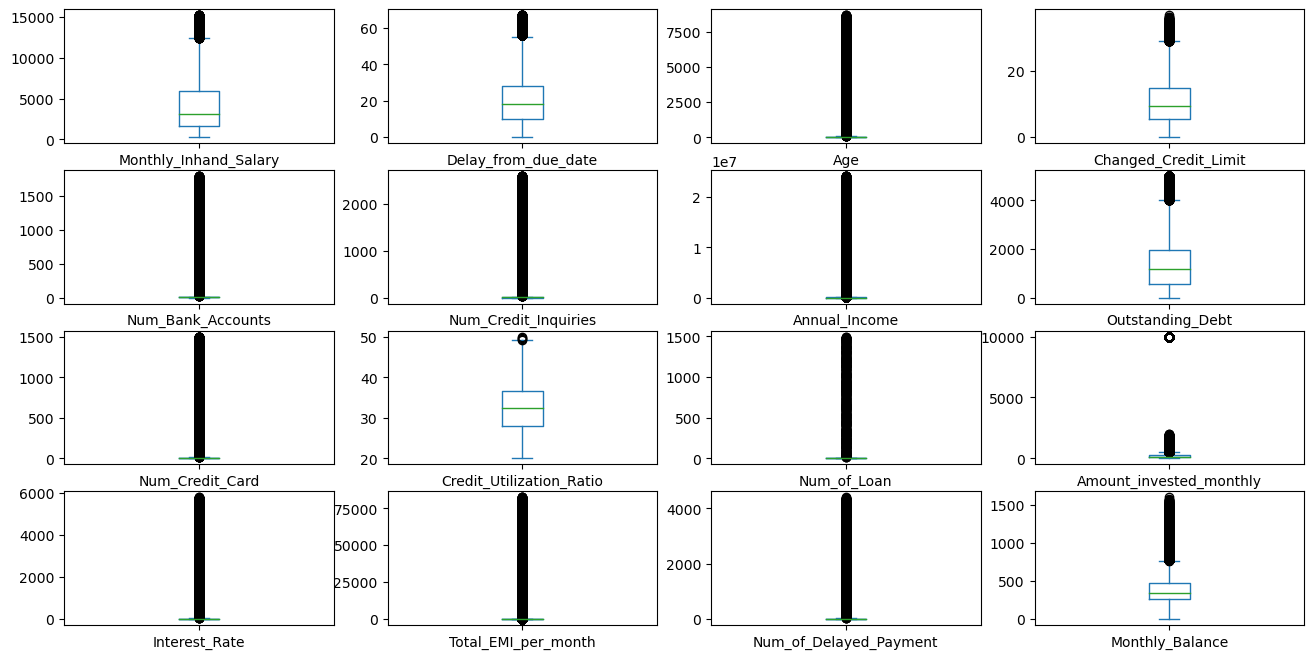

In [42]:
fig, ax = plt.subplots(4,4, figsize=(16,8))
for idx, cat in enumerate(numerical_data.columns):
    numerical_data[[cat]].plot(kind='box', ax= ax[idx%4, idx//4])

In [43]:
filter_numerical_columns = ['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
                            'Num_Credit_Inquiries','Num_Credit_Inquiries','Num_of_Loan',
                            'Num_of_Delayed_Payment']

In [44]:
new_num_data = replace_outlier(numerical_data, outliers,filter_numerical_columns)
new_num_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,1824.843333,3.0,4.0,3.0,3.0,4.0,26.822620,49.574949,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,NaN,3.0,4.0,3.0,NaN,4.0,31.944960,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,NaN,3.0,4.0,3.0,3.0,4.0,28.609352,49.574949,NaN,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,NaN,3.0,4.0,3.0,5.0,4.0,31.377862,49.574949,23.0,19114.12,4.0,NaN,6.27,809.98,199.458074,223.451310
4,1824.843333,3.0,4.0,3.0,6.0,4.0,24.797347,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4.0,6.0,7.0,23.0,3.0,34.663572,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,60.971333,479.866228
99996,3359.415833,4.0,6.0,7.0,18.0,3.0,40.565631,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,54.185950,496.651610
99997,3359.415833,4.0,6.0,NaN,27.0,3.0,41.255522,35.104023,25.0,39628.99,2.0,6.0,11.50,502.38,24.028477,516.809083
99998,3359.415833,4.0,6.0,7.0,20.0,3.0,33.638208,35.104023,25.0,39628.99,2.0,NaN,11.50,502.38,251.672582,319.164979


In [45]:
new_num_data.iloc[new_num_data.query('Age >= 99').index] = np.nan

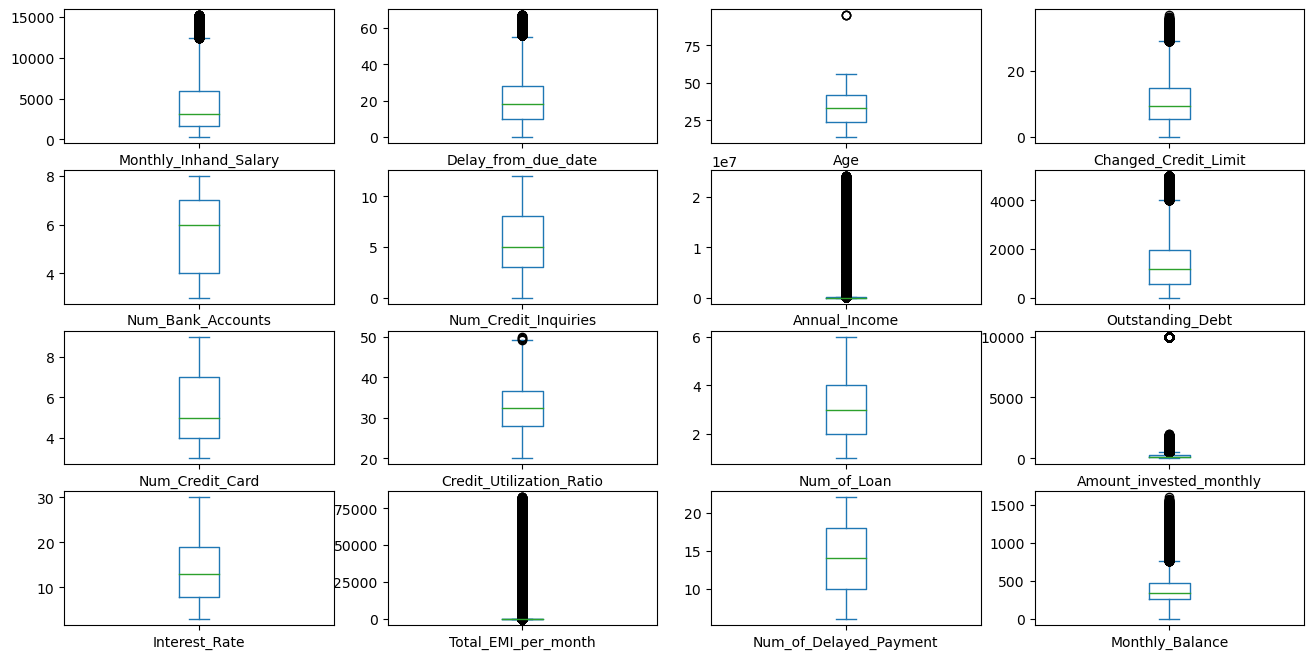

In [46]:
fig, ax = plt.subplots(4,4, figsize=(16,8))
for idx, cat in enumerate(new_num_data.columns):
    new_num_data[[cat]].plot(kind='box', ax= ax[idx%4, idx//4])

In [47]:
def drop_nan(df:pd.DataFrame, threshold:int=0.70) -> np.array:
    '''
    Primero eliminamos las filas con un porcentaje de nan >= al threshold
    Despues eliminamos las columnas con un porcentaje de nan >= al threshold
    '''
    df = df.copy()
    filtro_index = df.isna().sum(axis=1)/len(df.columns) >= threshold
    index_nulls = df[filtro_index].index
    
    filtro_columns = df.isna().sum()/len(df) >= threshold
    columns_nulls = df.columns[filtro_columns]
    
    return index_nulls

In [48]:
null_instances = drop_nan(new_num_data)

In [49]:
new_num_data = new_num_data.drop(null_instances, axis=0)

In [50]:
new_num_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,1824.843333,3.0,4.0,3.0,3.0,4.0,26.822620,49.574949,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,NaN,3.0,4.0,3.0,NaN,4.0,31.944960,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,NaN,3.0,4.0,3.0,3.0,4.0,28.609352,49.574949,NaN,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,NaN,3.0,4.0,3.0,5.0,4.0,31.377862,49.574949,23.0,19114.12,4.0,NaN,6.27,809.98,199.458074,223.451310
4,1824.843333,3.0,4.0,3.0,6.0,4.0,24.797347,49.574949,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4.0,6.0,7.0,23.0,3.0,34.663572,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,60.971333,479.866228
99996,3359.415833,4.0,6.0,7.0,18.0,3.0,40.565631,35.104023,25.0,39628.99,2.0,7.0,11.50,502.38,54.185950,496.651610
99997,3359.415833,4.0,6.0,NaN,27.0,3.0,41.255522,35.104023,25.0,39628.99,2.0,6.0,11.50,502.38,24.028477,516.809083
99998,3359.415833,4.0,6.0,7.0,20.0,3.0,33.638208,35.104023,25.0,39628.99,2.0,NaN,11.50,502.38,251.672582,319.164979


In [51]:
np.sum(new_num_data.isna(), axis=0)

Monthly_Inhand_Salary       14732
Num_Bank_Accounts           24666
Num_Credit_Card             11219
Interest_Rate               13110
Delay_from_due_date           583
Num_Credit_Inquiries         7560
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Age                           886
Annual_Income                   0
Num_of_Loan                 28944
Num_of_Delayed_Payment      24904
Changed_Credit_Limit         3618
Outstanding_Debt                0
Amount_invested_monthly      4382
Monthly_Balance              1194
dtype: int64

### Imputacion datos numericos

In [52]:
new_num_data = new_num_data.interpolate()

In [53]:
data.Num_Credit_Card.unique()

array([   4, 1385,    5, ...,  955, 1430,  679], dtype=int64)

In [54]:
new_num_data.Num_Credit_Card.map(lambda x: int(x))

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 98108, dtype: int64

In [55]:
np.sum(new_num_data.isna(), axis=0)

Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Age                         0
Annual_Income               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Outstanding_Debt            0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64

In [56]:
new_num_data.dtypes

Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Delay_from_due_date         float64
Num_Credit_Inquiries        float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Age                         float64
Annual_Income               float64
Num_of_Loan                 float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Outstanding_Debt            float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object

# Tratamiento de datos categoricos

In [57]:
# Payment_Behaviour
categorical_data.loc[categorical_data[categorical_data.Payment_Behaviour == '!@9#%8'].index,'Payment_Behaviour'] = np.nan

In [58]:
# Occupation
categorical_data.loc[categorical_data[categorical_data.Occupation == '_______'].index,'Occupation'] = np.nan

In [59]:
# Payment of min amount
categorical_data.loc[categorical_data[categorical_data.Payment_of_Min_Amount == 'NM'].index,'Payment_of_Min_Amount'] = np.nan

In [60]:
categorical_data.Payment_of_Min_Amount.unique()

array(['No', nan, 'Yes'], dtype=object)

In [61]:
# Drop credit mix
categorical_data = categorical_data.drop('Credit_Mix',axis=1)

In [62]:
np.sum(categorical_data.isna(), axis=0)

Customer_ID                  0
Month                        0
Occupation                7062
Type_of_Loan             11408
Credit_History_Age        9030
Payment_of_Min_Amount    12007
Payment_Behaviour         7600
Credit_Score                 0
dtype: int64

In [63]:
categorical_data.Occupation.unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [64]:
categorical_data

,Customer_ID,Month,Occupation,Type_of_Loan,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,CUS_0xd40,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,CUS_0xd40,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,Low_spent_Large_value_payments,Good
2,CUS_0xd40,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,CUS_0xd40,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,CUS_0xd40,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 5 Months,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Mechanic,"Auto Loan, and Student Loan",31 Years and 6 Months,No,High_spent_Large_value_payments,Poor
99996,CUS_0x942c,May,Mechanic,"Auto Loan, and Student Loan",31 Years and 7 Months,No,High_spent_Medium_value_payments,Poor
99997,CUS_0x942c,June,Mechanic,"Auto Loan, and Student Loan",31 Years and 8 Months,No,High_spent_Large_value_payments,Poor
99998,CUS_0x942c,July,Mechanic,"Auto Loan, and Student Loan",31 Years and 9 Months,No,Low_spent_Large_value_payments,Standard


In [65]:
categorical_data['Type_of_Loan'] = categorical_data[['Type_of_Loan']].replace(np.nan, 'No Data')

In [66]:
categorical_data['Type_of_Loan'] = categorical_data.Type_of_Loan.str.replace(r'and ','', regex=True)

In [67]:
categorical_data.Type_of_Loan = categorical_data.Type_of_Loan.apply(lambda x: [x])

In [68]:
list_loans = []
for i in categorical_data.Type_of_Loan:
    list_loans.extend(i[0].split(', '))

In [69]:
unique_types_loans = list(set(list_loans))

In [70]:
unique_types = {tl:idx for idx,tl in enumerate(unique_types_loans)}

In [71]:
unique_types

{'Not Specified': 0,
 'Payday Loan': 1,
 'Personal Loan': 2,
 'Mortgage Loan': 3,
 'Student Loan': 4,
 'Auto Loan': 5,
 'Credit-Builder Loan': 6,
 'Home Equity Loan': 7,
 'No Data': 8,
 'Debt Consolidation Loan': 9}

In [72]:
def encoder_loan(x):
    x_list = x[0].split(', ')
    for idx, l in enumerate(x_list):            
        x_list[idx] =  unique_types[l]

    return x_list


In [73]:
categorical_data['Type_of_Loan'] = categorical_data.Type_of_Loan.apply(encoder_loan)

In [74]:
categorical_data

,Customer_ID,Month,Occupation,Type_of_Loan,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,CUS_0xd40,January,Scientist,"[5, 6, 2, 7]",22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,CUS_0xd40,February,Scientist,"[5, 6, 2, 7]",NaN,No,Low_spent_Large_value_payments,Good
2,CUS_0xd40,March,Scientist,"[5, 6, 2, 7]",22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,CUS_0xd40,April,Scientist,"[5, 6, 2, 7]",22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,CUS_0xd40,May,Scientist,"[5, 6, 2, 7]",22 Years and 5 Months,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Mechanic,"[5, 4]",31 Years and 6 Months,No,High_spent_Large_value_payments,Poor
99996,CUS_0x942c,May,Mechanic,"[5, 4]",31 Years and 7 Months,No,High_spent_Medium_value_payments,Poor
99997,CUS_0x942c,June,Mechanic,"[5, 4]",31 Years and 8 Months,No,High_spent_Large_value_payments,Poor
99998,CUS_0x942c,July,Mechanic,"[5, 4]",31 Years and 9 Months,No,Low_spent_Large_value_payments,Standard


In [75]:
new_features = pd.DataFrame(np.zeros((categorical_data.shape[0], len(unique_types))),
                            columns=unique_types.keys())

In [76]:
new_features

,Not Specified,Payday Loan,Personal Loan,Mortgage Loan,Student Loan,Auto Loan,Credit-Builder Loan,Home Equity Loan,No Data,Debt Consolidation Loan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
categorical_data.Type_of_Loan

0        [5, 6, 2, 7]
1        [5, 6, 2, 7]
2        [5, 6, 2, 7]
3        [5, 6, 2, 7]
4        [5, 6, 2, 7]
             ...     
99995          [5, 4]
99996          [5, 4]
99997          [5, 4]
99998          [5, 4]
99999          [5, 4]
Name: Type_of_Loan, Length: 100000, dtype: object

In [78]:
for idx, h in enumerate(categorical_data.Type_of_Loan):
    new_features.iloc[idx,h] = [1 for i in range(len(h))]

In [79]:
categorical_data

,Customer_ID,Month,Occupation,Type_of_Loan,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,CUS_0xd40,January,Scientist,"[5, 6, 2, 7]",22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,CUS_0xd40,February,Scientist,"[5, 6, 2, 7]",NaN,No,Low_spent_Large_value_payments,Good
2,CUS_0xd40,March,Scientist,"[5, 6, 2, 7]",22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,CUS_0xd40,April,Scientist,"[5, 6, 2, 7]",22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,CUS_0xd40,May,Scientist,"[5, 6, 2, 7]",22 Years and 5 Months,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Mechanic,"[5, 4]",31 Years and 6 Months,No,High_spent_Large_value_payments,Poor
99996,CUS_0x942c,May,Mechanic,"[5, 4]",31 Years and 7 Months,No,High_spent_Medium_value_payments,Poor
99997,CUS_0x942c,June,Mechanic,"[5, 4]",31 Years and 8 Months,No,High_spent_Large_value_payments,Poor
99998,CUS_0x942c,July,Mechanic,"[5, 4]",31 Years and 9 Months,No,Low_spent_Large_value_payments,Standard


In [80]:
categorical_data = categorical_data.join(new_features)

In [81]:
def get_age(x):
    try:
        return int(x[:2].strip())
    except:
        return x

In [82]:
categorical_data['Credit_History_Age'] = categorical_data.Credit_History_Age.apply(get_age)

In [83]:
categorical_data['Credit_History_Age'] = categorical_data.Credit_History_Age.interpolate()

In [84]:
categorical_data

,Customer_ID,Month,Occupation,Type_of_Loan,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Not Specified,Payday Loan,Personal Loan,Mortgage Loan,Student Loan,Auto Loan,Credit-Builder Loan,Home Equity Loan,No Data,Debt Consolidation Loan
0,CUS_0xd40,January,Scientist,"[5, 6, 2, 7]",22.0,No,High_spent_Small_value_payments,Good,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,CUS_0xd40,February,Scientist,"[5, 6, 2, 7]",22.0,No,Low_spent_Large_value_payments,Good,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,CUS_0xd40,March,Scientist,"[5, 6, 2, 7]",22.0,No,Low_spent_Medium_value_payments,Good,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,CUS_0xd40,April,Scientist,"[5, 6, 2, 7]",22.0,No,Low_spent_Small_value_payments,Good,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,CUS_0xd40,May,Scientist,"[5, 6, 2, 7]",22.0,No,High_spent_Medium_value_payments,Good,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Mechanic,"[5, 4]",31.0,No,High_spent_Large_value_payments,Poor,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99996,CUS_0x942c,May,Mechanic,"[5, 4]",31.0,No,High_spent_Medium_value_payments,Poor,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99997,CUS_0x942c,June,Mechanic,"[5, 4]",31.0,No,High_spent_Large_value_payments,Poor,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99998,CUS_0x942c,July,Mechanic,"[5, 4]",31.0,No,Low_spent_Large_value_payments,Standard,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [85]:
new_num_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,1824.843333,3.0,4.0,3.0,3.0,4.0,26.822620,49.574949,23.0,19114.12,4.0,7.00,11.27,809.98,80.415295,312.494089
1,1824.843333,3.0,4.0,3.0,3.0,4.0,31.944960,49.574949,23.0,19114.12,4.0,7.00,11.27,809.98,118.280222,284.629162
2,1824.843333,3.0,4.0,3.0,3.0,4.0,28.609352,49.574949,23.0,19114.12,4.0,7.00,8.77,809.98,81.699521,331.209863
3,1824.843333,3.0,4.0,3.0,5.0,4.0,31.377862,49.574949,23.0,19114.12,4.0,7.25,6.27,809.98,199.458074,223.451310
4,1824.843333,3.0,4.0,3.0,6.0,4.0,24.797347,49.574949,23.0,19114.12,4.0,7.50,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4.0,6.0,7.0,23.0,3.0,34.663572,35.104023,25.0,39628.99,2.0,7.00,11.50,502.38,60.971333,479.866228
99996,3359.415833,4.0,6.0,7.0,18.0,3.0,40.565631,35.104023,25.0,39628.99,2.0,7.00,11.50,502.38,54.185950,496.651610
99997,3359.415833,4.0,6.0,7.0,27.0,3.0,41.255522,35.104023,25.0,39628.99,2.0,6.00,11.50,502.38,24.028477,516.809083
99998,3359.415833,4.0,6.0,7.0,20.0,3.0,33.638208,35.104023,25.0,39628.99,2.0,6.00,11.50,502.38,251.672582,319.164979


In [90]:
drop_nan(categorical_data)

Int64Index([], dtype='int64')

In [91]:
full_data = new_num_data.join(categorical_data).drop('Customer_ID', axis='columns')
full_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Age,Annual_Income,...,Not Specified,Payday Loan,Personal Loan,Mortgage Loan,Student Loan,Auto Loan,Credit-Builder Loan,Home Equity Loan,No Data,Debt Consolidation Loan
0,1824.843333,3.0,4.0,3.0,3.0,4.0,26.822620,49.574949,23.0,19114.12,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1824.843333,3.0,4.0,3.0,3.0,4.0,31.944960,49.574949,23.0,19114.12,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1824.843333,3.0,4.0,3.0,3.0,4.0,28.609352,49.574949,23.0,19114.12,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1824.843333,3.0,4.0,3.0,5.0,4.0,31.377862,49.574949,23.0,19114.12,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1824.843333,3.0,4.0,3.0,6.0,4.0,24.797347,49.574949,23.0,19114.12,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4.0,6.0,7.0,23.0,3.0,34.663572,35.104023,25.0,39628.99,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99996,3359.415833,4.0,6.0,7.0,18.0,3.0,40.565631,35.104023,25.0,39628.99,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99997,3359.415833,4.0,6.0,7.0,27.0,3.0,41.255522,35.104023,25.0,39628.99,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99998,3359.415833,4.0,6.0,7.0,20.0,3.0,33.638208,35.104023,25.0,39628.99,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [99]:
full_data = full_data.dropna()

In [104]:
full_data.drop('Not Specified', axis='columns', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_12852\1184541197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data.drop('Not Specified', axis='columns', inplace=True)


In [107]:
full_data.drop('No Data', axis='columns', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_12852\1453307369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data.drop('No Data', axis='columns', inplace=True)


In [109]:
full_data.isna().sum(axis=0)

Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Age                         0
Annual_Income               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Outstanding_Debt            0
Amount_invested_monthly     0
Monthly_Balance             0
Month                       0
Occupation                  0
Type_of_Loan                0
Credit_History_Age          0
Payment_of_Min_Amount       0
Payment_Behaviour           0
Credit_Score                0
Payday Loan                 0
Personal Loan               0
Mortgage Loan               0
Student Loan                0
Auto Loan                   0
Credit-Builder Loan         0
Home Equity Loan            0
Debt Consolidation Loan     0
dtype: int64

In [110]:
full_data.to_csv('clean_data.csv')